# Exploratory Data Analysis

Before we do any formal machine learning, we will pause, and back up a step and attempt to understand our data better. **Exploratory data analysis** (EDA) is a term used to define the approach one can take to better understand data without the use of formal modeling tools. EDA makes have use of summary statistics and visualizations to gather insights. These insights can later be used to test hypothesis and build machine learning models.

In [1]:
import pandas as pd
%matplotlib inline
housing = pd.read_csv('../data/housing_sample.csv')
housing.head()

,Neighborhood,Exterior1st,YearBuilt,LotFrontage,GrLivArea,GarageArea,BedroomAbvGr,FullBath,OverallQual,HeatingQC,SalePrice
0,CollgCr,VinylSd,2003,65.0,1710,548,3,2,7,Ex,208500
1,Veenker,MetalSd,1976,80.0,1262,460,3,2,6,Ex,181500
2,CollgCr,VinylSd,2001,68.0,1786,608,3,2,7,Ex,223500
3,Crawfor,Wd Sdng,1915,60.0,1717,642,3,1,7,Gd,140000
4,NoRidge,VinylSd,2000,84.0,2198,836,4,2,8,Ex,250000


## Essential data information

When starting EDA, the most essential information about your data is the number of rows and columns, the data type of each column and the number of missing values in each column. Let's get the number of rows and columns with the `shape` attribute.

In [2]:
housing.shape

(1460, 11)

### Data types

The data type of each column is one of the most essential pieces of information that you must know about your data. Each column has a data type and this data type. Let's retrieve with the `dtypes` attribute which returns a Series with the column names in the index and their type as the values.

In [3]:
housing.dtypes

Neighborhood     object
Exterior1st      object
YearBuilt         int64
LotFrontage     float64
GrLivArea         int64
GarageArea        int64
BedroomAbvGr      int64
FullBath          int64
OverallQual       int64
HeatingQC        object
SalePrice         int64
dtype: object

The reason the column data type is so important is that it informs us what the type of each value in the column is guaranteed to be. For instance, `GarageArea` has data type 'int64' which stands for 64-bit integer. Every value in this column is also a 64-bit integer.

The one exception to this rule is the object type, which allows for any Python object to be in its column. However, the vast majority of the time, these columns will be comprised of nothing but strings as is the case with the housing dataset. Therefore, when you see 'object' as a data type in this book, it will be safe to assume that the individual values are strings.

### Missing values

The number of missing values in each column is perhaps next on the list of essential information to know about your data. As we will learn, scikit-learn machine learning models are not able to work with data that has missing values. Let's use the pandas `isna` method to convert all the values in the DataFrame to True or False based on whether they are missing or not and then `sum` each column. Since False evaluates as 0 and True as 1, the returned result contains the number of missing values for each column. In this dataset, only the `LotFrontage` feature has missing values.

In [4]:
housing.isna().sum()

Neighborhood      0
Exterior1st       0
YearBuilt         0
LotFrontage     259
GrLivArea         0
GarageArea        0
BedroomAbvGr      0
FullBath          0
OverallQual       0
HeatingQC         0
SalePrice         0
dtype: int64

## Kinds of data

Broadly speaking, there are two main types of data found in datasets, **continuous** and **categorical**. Continuous data are always numeric and don't have a limited, known, and discrete set of possibilities. There is also a natural ordering to the numbers, where larger values mean 'more' of that column. Columns like `GrLivArea` or `GarageArea` are continuous as there is no known distinct set of values these columns will hold.  

Categorical columns are those that have discrete values. The set of discrete values is usually known and limited. All columns containing strings are necessarily categorical, but numeric columns can be categorical as well. In our housing data, `Neighborhood`, `Exterior1st`, and `HeatingQC` are the obvious columns that are categorical since they contain strings.

There are numeric columns in our dataset that are categorical such as `OverallQual`. According to the data dictionary, there are 10 unique values. The integers from 1 through 10 represent its entire range. Since integers are discrete, all the values are known, and they are limited to just 10, we can classify `OverallQual` as categorical.

Other columns also have discrete values such as `FullBath` and `BedroomAbvGr`. For most houses, the values for these columns will be under 10 and in our dataset and even smaller range. Although its possible for a house to have any number of bathrooms or bedrooms, these columns are much closer to the categorical column definition than the continuous one. We can treat them as categorical for now.

Within categorical, there are two further classifications, ordinal and nominal variables. Ordinal variables have a particular ordering such as a rating on a survey or quality of a house. On the other hand, nominal variables do not have any inherent ordering. Type of neighborhood or exterior of a house, or zip code are examples of nominal variables. As we continue along our EDA, we will label each column we see as continuous, ordinal, or nominal.

## Univariate analysis

We are now ready to move onto more interesting data analysis. There is no universally agreed upon set of steps to take when doing EDA. However, I suggest beginning by analyzing a single variable at a time also known as **univariate analysis**.

For continuous data, I attempt to understand its distribution by doing the following:

* Finding summary statistics - min, max, mean, median, standard deviation
* Making boxplots, histograms, and Kernel-density estimate plots

For categorical data, I look at the frequency of each category and if numeric will sometimes compute the same summary statistics as continuous data (especially if it is ordinal).

I suggest exploring each column in the dataset one at a time so that you can understand it better.

### Neighborhood

The `Neighborhood` column contains the abbreviated names of many different neighborhoods within the city of Ames. It is a nominal column as it is categorical with no inherent ordering. As suggested, let's take a look at the occurrence of each unique value with the `value_counts` method.

In [5]:
housing['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

This is a good first step to understand how the neighborhoods are distributed. It certainly is not a uniform distribution. Notice that one neighborhood, Blueste, only appears twice. For categorical data, values that appear very infrequently might be outliers and be a reason to examine further. For example, perhaps there was a typo and this neighborhood was actually meant to be another.

Instead of the raw counts, we can calculate the frequency of occurrence with the same method and setting the `normalize` parameter to True.

In [6]:
housing['Neighborhood'].value_counts(normalize=True).round(3).head()

NAmes      0.154
CollgCr    0.103
OldTown    0.077
Edwards    0.068
Somerst    0.059
Name: Neighborhood, dtype: float64

To get a more complete picture of the distribution of neighborhoods, we can make a bar plot of the frequencies.

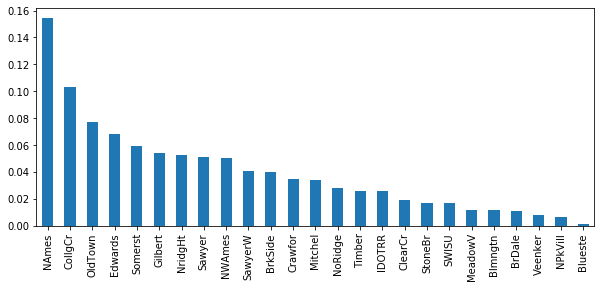

In [7]:
housing['Neighborhood'].value_counts(normalize=True).plot(kind='bar', figsize=(10, 4));

### Exterior1st

The next column, `Exterior1st` (the exterior covering of the house) is also nominal. Let's apply the exploratory techniques to it.

In [8]:
housing['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64

The `Exterior1st` column is even more unevenly distributed than neighborhood and has five values that appear only once or twice. We may need to merge these categories that appear so infrequently into an 'OTHER' category in order to generalize from them. Let's plot its relative frequency.

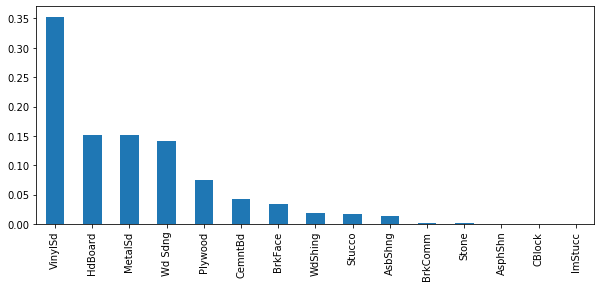

In [9]:
housing['Exterior1st'].value_counts(normalize=True).plot(kind='bar', figsize=(10, 4));

### YearBuilt

The `YearBuilt` contains the original construction date of the house. This column is interesting in that it contains elements of both the categorical and continuous data definition. While every value is a discrete integer, there isn't a known, limited range for them. Year does have an inherent order. Let's begin by finding the number of unique values using the `nunique` method.

In [10]:
housing['YearBuilt'].nunique()

112

We can find the number of occurrence of each of these 112 years, but since there are so many, we output just the 10 most frequent years.

In [11]:
housing['YearBuilt'].value_counts().head(10)

2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1999    25
Name: YearBuilt, dtype: int64

To get a different view of the distribution, we can make a histogram, which automatically bins the data into particular year groups. Here, we make a histogram with 20 bins of equal width.

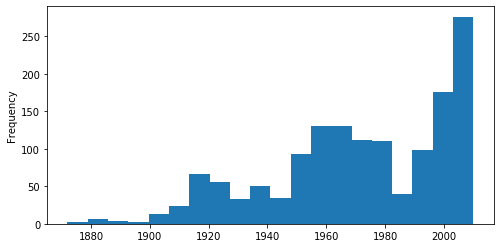

In [12]:
housing['YearBuilt'].plot(kind='hist', bins=20, figsize=(8, 4));

We can do a similar procedure non-graphically with the pandas `cut` function. Here, we supply the exact bin edges (which are inclusive of the right value). First we get the minimum and maximum values for year.

In [13]:
housing['YearBuilt'].agg(['min', 'max'])

min    1872
max    2010
Name: YearBuilt, dtype: int64

Using these endpoints, we create several bins and then count the occurrence of each group.

In [14]:
bins = [1871, 1899, 1934, 1949, 1969, 1999, 2010]
pd.cut(housing['YearBuilt'], bins).value_counts()

(1969, 1999]    412
(1999, 2010]    388
(1949, 1969]    342
(1899, 1934]    192
(1934, 1949]    111
(1871, 1899]     15
Name: YearBuilt, dtype: int64

We can find the relative frequency and then sort by the year grouping.

In [15]:
pd.cut(housing['YearBuilt'], bins).value_counts(normalize=True).sort_index().round(2)

(1871, 1899]    0.01
(1899, 1934]    0.13
(1934, 1949]    0.08
(1949, 1969]    0.23
(1969, 1999]    0.28
(1999, 2010]    0.27
Name: YearBuilt, dtype: float64

### LotFrontage

The `LotFrontage` column contains the linear feet of street connected to the property. Note, that the units are feet and not squared feet. This is our first column that is clearly continuous. Let's get it's summary statistics with the `describe` method.

In [16]:
housing['LotFrontage'].describe().round(0)

count    1201.0
mean       70.0
std        24.0
min        21.0
25%        59.0
50%        69.0
75%        80.0
max       313.0
Name: LotFrontage, dtype: float64

The value for `count` is the total number of non-missing values and is NOT the length of the column. We know from using the `shape` attribute that the total number of values in each column is 1460. We also calculated that 259 values were missing which is how we have a count of 1201. Let's plot the KDE of `LotFrontage`.

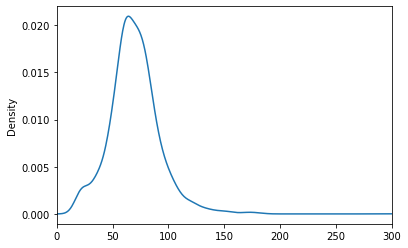

In [17]:
housing['LotFrontage'].plot(kind='kde', xlim=(0, 300))

The `KDE` gives us an approximation of the probability distribution function. Taking the area under the curve between two `x` values will return us an approximate probability for the actual value being in that range. From the plot, much of the data appears to be between 50 and 100. Let's use a boxplot now, which is a great plot to detect outliers.

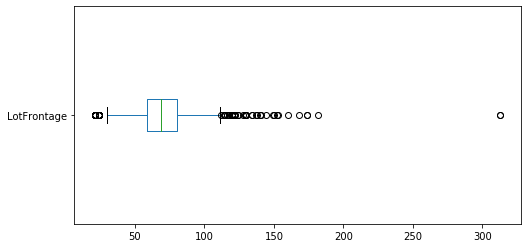

In [18]:
housing['LotFrontage'].plot(kind='box', vert=False, figsize=(8, 4));

The edges of the box represent the first and third quartiles and are known as the interquartile range (IQR). This means that 75% of the data is within this narrow range. The 'whiskers' are set by default at 1.5 times the IQR. Values outside of these whiskers are plotted as individual points and are candidates for further inspection as possible outliers. There is one house with a lot frontage of 100 more than any other house. This one should definitely be inspected.

### GrLivArea

The `GrLivArea` column contains data on the above ground living area in square feet and is an extremely common piece of information that buyers are interested in knowing. It is also a continuous column of data. Let's begin by calculating the summary statistics.

In [19]:
housing['GrLivArea'].describe().round(0)

count    1460.0
mean     1515.0
std       525.0
min       334.0
25%      1130.0
50%      1464.0
75%      1777.0
max      5642.0
Name: GrLivArea, dtype: float64

We can use a histogram this time to get an idea of the entire distribution.

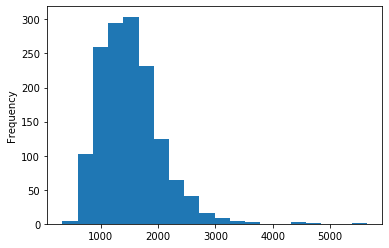

In [20]:
housing['GrLivArea'].plot(kind='hist', bins=20);

Histograms are very similar to KDE plots and you can even plot them one on top of the other to verify this is the case. To do, when need to normalize the histogram and report the relative frequency for each group so that it has the same scale as the KDE.

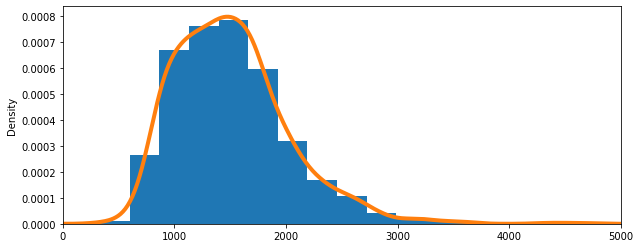

In [21]:
housing['GrLivArea'].plot(kind='hist', bins=20, density=True, figsize=(10, 4))
housing['GrLivArea'].plot(kind='kde', linewidth=4, xlim=(0, 5000));

To see possible individual outliers, use a boxplot. Notice that four houses are larger than 4,000 square feet and clearly separated from the others.

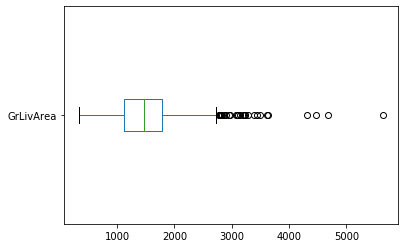

In [22]:
housing['GrLivArea'].plot(kind='box', vert=False);

### GarageArea

The `GarageArea` column contains the size of the garage in square feet and is continuous. The analysis is virtually identical to `GrLivArea`.

In [23]:
housing['GarageArea'].describe().round(0)

count    1460.0
mean      473.0
std       214.0
min         0.0
25%       334.0
50%       480.0
75%       576.0
max      1418.0
Name: GarageArea, dtype: float64

There are many houses that do not have garages which can be identified with this histogram.

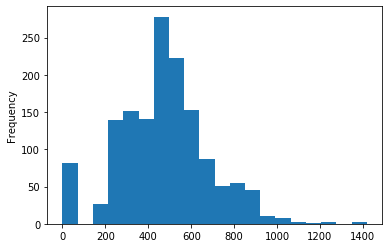

In [24]:
housing['GarageArea'].plot(kind='hist', bins=20);

While the boxplot does reveal some values outside of the whiskers, they quite as far removed as the largest values for `GrLivArea`.

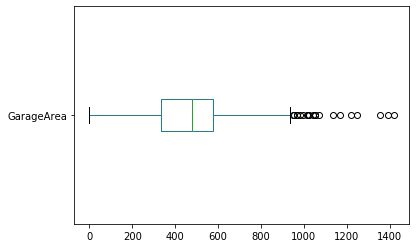

In [25]:
housing['GarageArea'].plot(kind='box', vert=False);

### BedroomAbvGr

The `BedroomAbvGr` column contains the number of above ground bedrooms. These values are discrete integers and while the range isn't known exactly ahead of time, it likely is limited. Let's analyze it at as if it were categorical by counting the occurrences of each unique value.

In [26]:
housing['BedroomAbvGr'].value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

Nearly all houses have between one and five bedrooms, but strangely there are six houses without any bedrooms whatsoever. This seems unlikely, so these houses need to be examined further.

### FullBath

The `FullBath` column contains the number of full bathrooms in the house. This is also a discrete integer with a limited, yet unknown range. We will also analyze it as if it were categorical.

In [27]:
housing['FullBath'].value_counts()

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

Nine houses have no full bathrooms. These houses might need to be examined, as it is uncommon.

### OverallQual

The `OverallQual` column rates the overall material and finish of the house and is an integer between 1 and 10. Since the range is known, and its values are limited, discrete, and have an inherent ordering, we have an ordinal variable. The By default, `value_counts` sorts by the frequency of occurrence. Here, we sort by the index, which is the value of `OverallQuall`.

In [28]:
housing['OverallQual'].value_counts().sort_index()

1       2
2       3
3      20
4     116
5     397
6     374
7     319
8     168
9      43
10     18
Name: OverallQual, dtype: int64

The distribution looks fairly symmetrical centered around 6. There are only a few houses with a value of `OverallQuall` less than 3. These might need to be investigated more closely.

### HeatingQC

The `HeatingQC` column contains the heating quality and condition and rates it with five discrete categories from Excellent ('Ex') to Poor ('PA'). These categories have an inherent order so therefore we have our first column of strings that is ordinal. Let's count the occurrences of all the values.

In [29]:
housing['HeatingQC'].value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

The single house with poor heating quality should be examined further.

### SalePrice

The column `SalePrice` contains the sale price of the house in dollars. This is the column we are going to try to predict. It is continuous. Let's begin by calculating summary statistics on it.

In [30]:
housing['SalePrice'].describe().round(0)

count      1460.0
mean     180921.0
std       79443.0
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64

To get a sense of where the majority of the data lies, use a boxplot.

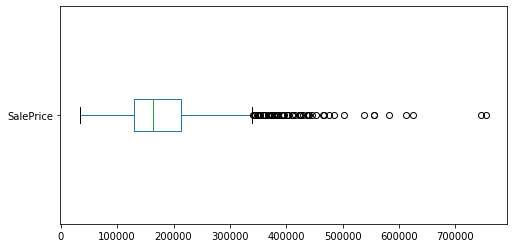

In [31]:
housing['SalePrice'].plot(kind='box', vert=False, figsize=(8, 4));

The vast majority of houses are less than 350,000 dollars.

## Multivariate analysis

Now that we've analyzed every single variable independent of the other, we can explore the relationships between two or more variables simultaneously. This is often referred to as multivariate analysis.

### Neighborhood vs SalePrice

We are most interested in predicting sale price, so the following plots will all show some analysis involving one of the columns with `SalePrice`. We begin, by finding the average sale price by neighborhood. The results indicate a large variance based on neighborhood.

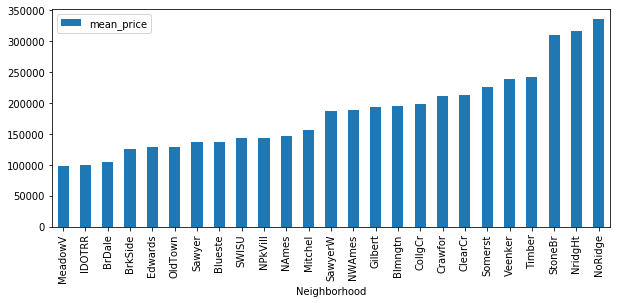

In [32]:
housing.groupby('Neighborhood').agg(mean_price=('SalePrice', 'mean')) \
       .sort_values('mean_price').plot(kind='bar', figsize=(10, 4));

### Exterior1st vs SalePrice

Let's do the same analysis with `Exterior1st` finding the average sale price for each of its unique values. There were four values that appeared twice or less. These are removed before the plot. As with neighborhood, there is a significant difference based on the kind of exterior.

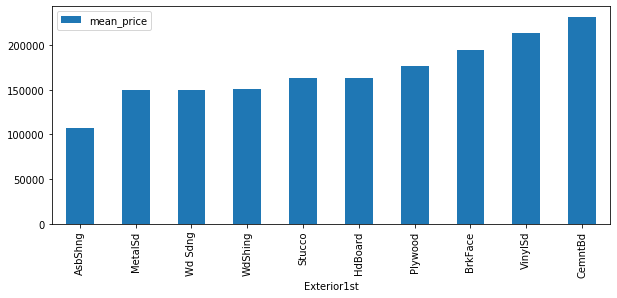

In [33]:
housing.groupby('Exterior1st').agg(mean_price=('SalePrice', 'mean'),
                                   count=('SalePrice', 'count')) \
       .query('count > 5') \
       .sort_values('mean_price').plot(kind='bar', y='mean_price', figsize=(10, 4));

### GrLivArea vs SalePrice

Let's now explore the relationship between the continuous column `GrLivArea` and `SalePrice`. This is our first multivariate analysis using two continuous columns. A scatterplot is often used in this case.

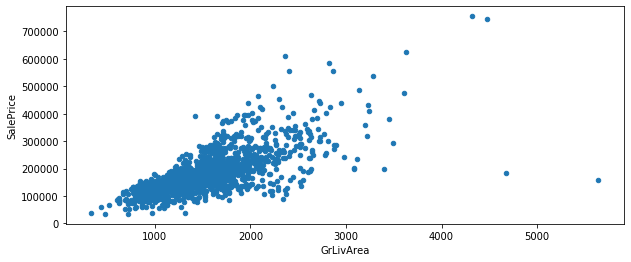

In [34]:
housing.plot(x='GrLivArea', y='SalePrice', kind='scatter', figsize=(10, 4));

There certainly seems to be a strong relationship with the sale price increasing directly with the above ground living area. Interestingly, there are two houses with very large above ground living area that are priced very low. These houses can be investigated. We can still make a bar plot of average sale price by binning the above ground living area into bins. Here, we bin every 500 square feet.

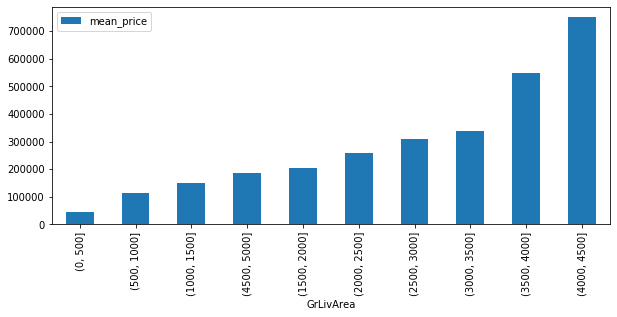

In [35]:
gr_bins = pd.cut(housing['GrLivArea'], bins=range(0, 5500, 500))
housing.groupby(gr_bins).agg(mean_price=('SalePrice', 'mean')) \
       .sort_values('mean_price').plot(kind='bar', figsize=(10, 4));

### LotFrontage vs SalePrice

We can repeat our analysis with `LotFrontage` first making a scatterplot.

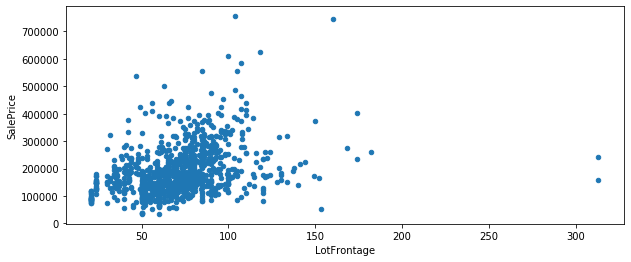

In [36]:
housing.plot(x='LotFrontage', y='SalePrice', kind='scatter', figsize=(10, 4));

It's difficult to determine if there is a relationship between the variables. Let's bin together the `LotFrontage` values and return the average sale price per group to get a different look. This plot makes a much clearer case that there could be some kind of relationship.

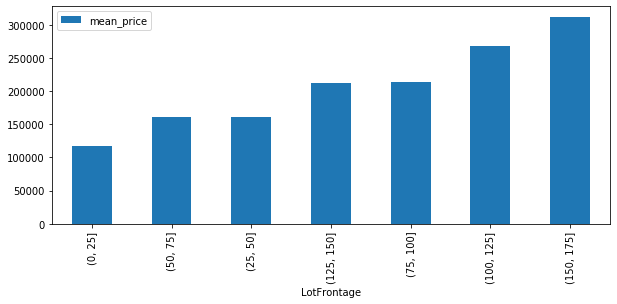

In [37]:
lf_bins = pd.cut(housing['LotFrontage'], bins=range(0, 200, 25))
housing.groupby(lf_bins).agg(mean_price=('SalePrice', 'mean')) \
       .sort_values('mean_price').plot(kind='bar', figsize=(10, 4));

## Using pivot tables for three or more variables

All of our multivariate analysis involved two variables, one of which was always the sale price. The pandas `pivot_table` method can help analyze more than two variables at a time. Here, we find the average sale price for each combination of full bathrooms and above ground living area (binned every 500 square feet up to 3,000).

In [38]:
gr_bins = pd.cut(housing['GrLivArea'], bins=range(0, 3500, 500))
housing.pivot_table(index=gr_bins, columns='FullBath', 
                    values='SalePrice', aggfunc='mean') \
       .round(-3).astype('Int64').head(10) \
       .style.format('{:,}')

FullBath,0,1,2,3
GrLivArea,,,,
"(0, 500]","35,000","50,000",nan,nan
"(500, 1000]","103,000","114,000","124,000",nan
"(1000, 1500]","150,000","135,000","172,000","179,000"
"(1500, 2000]","322,000","173,000","213,000","189,000"
"(2000, 2500]",nan,"222,000","260,000","297,000"
"(2500, 3000]",nan,"213,000","300,000","361,000"


## Correlation to SalePrice

We can see which numeric columns correlate highest to `SalePrice` using the `corrwith` method.

In [39]:
housing.corrwith(housing['SalePrice']).sort_values(ascending=False).round(2)

SalePrice       1.00
OverallQual     0.79
GrLivArea       0.71
GarageArea      0.62
FullBath        0.56
YearBuilt       0.52
LotFrontage     0.35
BedroomAbvGr    0.17
dtype: float64

## Continuing EDA

These examples above should get you started exploring the housing dataset. With the full dataset, you can spend many days or even weeks on just EDA. Let's now move on to more formal machine learning.